In [ ]:
# Test number of niche clusters with CellCharter

In [1]:
import scanpy as sc
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import celltypist
from celltypist import models

from matplotlib import rcParams

import squidpy as sq
import cellcharter as cc

from print_versions import print_versions

In [2]:
print_versions(globals())

scanpy==1.9.6
pandas==2.1.4
seaborn==0.12.2
celltypist==1.6.3
matplotlib==3.8.2
squidpy==1.6.0
cellcharter==0.3.2


In [3]:
# Load global object
adata = sc.read_h5ad("h5ad/xenium5k_scVI.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 646121 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'sample', 'graphclust', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'megagut_lvl3_predicted_labels', 'megagut_lvl3_over_clustering', 'megagut_lvl3_majority_voting', 'megagut_lvl3_conf_score', 'megagut_lvl1_predicted_labels', 'megagut_lvl1_over_clustering', 'megagut_lvl1_majority_voting', 'megagut_lvl1_conf_score', 'fibro_predicted_labels', 'fibro_over_clustering', 'fibro_majority_voting', 'fibro_conf_score', 'MF1_prob', 'MF2_prob', 'PC_prob', 'S1_prob', 'S2_prob', 'S3_prob', 'S3x_prob

In [5]:
adata.obs.segmentation_method.value_counts()

segmentation_method
Segmented by interior stain (18S)                       495076
Segmented by boundary stain (ATP1A1+CD45+E-Cadherin)    128384
Segmented by nucleus expansion of 5.0µm                  22661
Name: count, dtype: int64

In [6]:
# Formating
adata.obs.sample = adata.obs['sample']

In [7]:
pd.set_option('display.max_rows', 200)

# Spatial clustering

In [19]:
adata.obs['sample'].value_counts()

sample
0043587_affected    240888
0033516_affected    239286
0033516_adjacent    121661
0043587_adjacent     44286
Name: count, dtype: int64

In [20]:
# Spatial neighborhood graph
sq.gr.spatial_neighbors(adata, library_key='sample', coord_type='generic', delaunay=True)

In [21]:
adata

AnnData object with n_obs × n_vars = 646121 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'sample', 'graphclust', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'megagut_lvl3_predicted_labels', 'megagut_lvl3_over_clustering', 'megagut_lvl3_majority_voting', 'megagut_lvl3_conf_score', 'megagut_lvl1_predicted_labels', 'megagut_lvl1_over_clustering', 'megagut_lvl1_majority_voting', 'megagut_lvl1_conf_score', 'fibro_predicted_labels', 'fibro_over_clustering', 'fibro_majority_voting', 'fibro_conf_score', 'MF1_prob', 'MF2_prob', 'PC_prob', 'S1_prob', 'S2_prob', 'S3_prob', 'S3x_prob

In [22]:
# Initiliaze spatial data structure. Needed for squidpy visualization, although data here is empty.
adata.uns['spatial'] = {library_id: {} for library_id in adata.obs.sample.cat.categories}

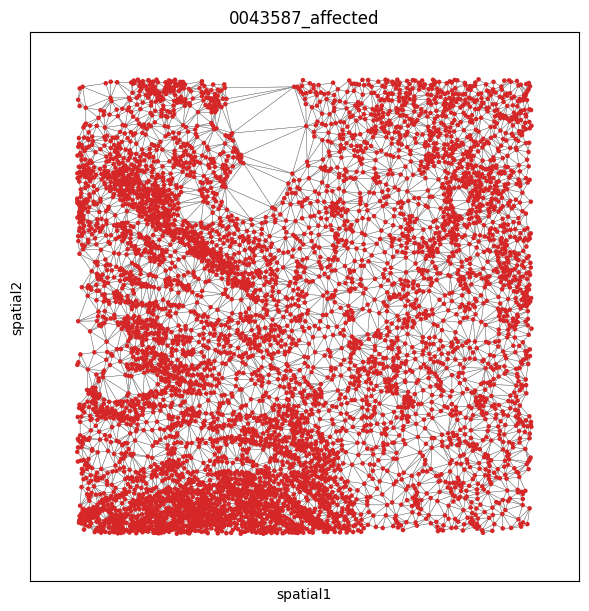

In [23]:
#library_id = "0043587_adjacent"
library_id = "0043587_affected"

rcParams["figure.figsize"] = (6, 6)

sq.pl.spatial_scatter(
    adata, 
    color='sample', 
    library_key='sample', 
    img=None, 
    title=library_id,
    size=5,
    connectivity_key='spatial_connectivities',
    edges_width=0.3,
    legend_loc=None,
    crop_coord=(500, 500, 1500, 1500 ),
    library_id=[library_id]
)

In [24]:
cc.gr.remove_long_links(adata)

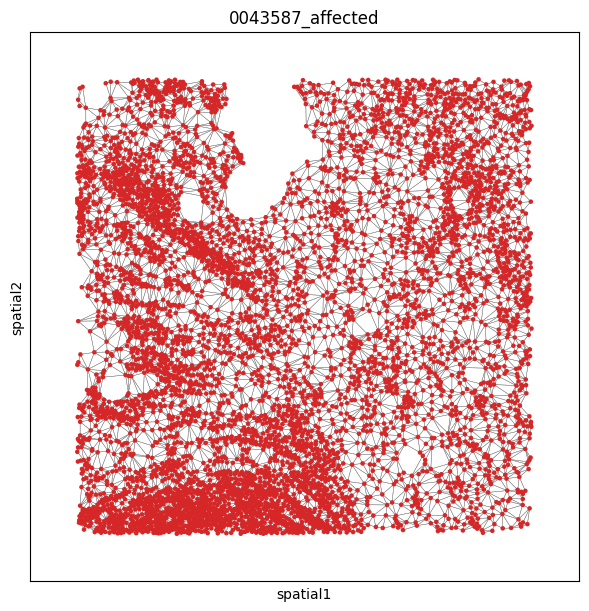

In [25]:
#library_id = "0043587_adjacent"
library_id = "0043587_affected"

rcParams["figure.figsize"] = (6, 6)

sq.pl.spatial_scatter(
    adata, 
    color='sample', 
    library_key='sample', 
    img=None, 
    title=library_id,
    size=5,
    connectivity_key='spatial_connectivities',
    edges_width=0.3,
    legend_loc=None,
    crop_coord=(500, 500, 1500, 1500 ),
    library_id=[library_id]
)

In [26]:
# Neighborhood aggregation
cc.gr.aggregate_neighbors(adata, n_layers=3, use_rep='X_scVI')


  0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
# Determine number of clusters
model_params = {
        'random_state': 42,
        'trainer_params': {
            'accelerator':'cpu',
            'enable_progress_bar': False
        },
}

models = cc.tl.ClusterAutoK(n_clusters=(4, 25), model_class=cc.tl.GaussianMixture, model_params=model_params, max_runs=5)

In [ ]:
models.fit(adata, use_rep='X_cellcharter')

Iteration 1/5


  0%|          | 0/24 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=5` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU a

Iteration 2/5


  0%|          | 0/24 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=5` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU a

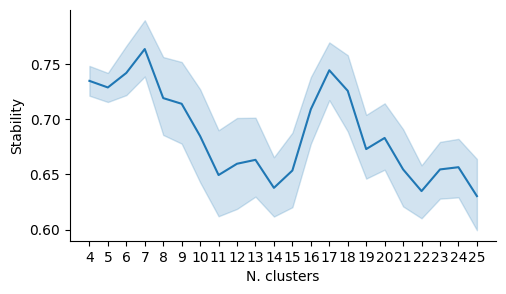

In [40]:
rcParams["figure.figsize"] = (5.5, 3)

ax = cc.pl.autok_stability(models, return_ax=True)
ax.grid(False)
ax.figure.savefig("figures_niches/CellCharter_stability_v2.pdf", bbox_inches='tight')